Nour Mansour and Juan Estrella

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

Part 1: Data Collection

Step 1: Get the tsv data

In [59]:
# Data is saved in the same folder as the project. Then read data from tsv file
data = pd.read_csv("train-balanced-sarcasm.csv")
data.dropna(inplace=True)
data.drop(['author', 'score', 'ups', 'downs', 'date', 'created_utc', 'subreddit', 'parent_comment'], axis = 1, inplace = True)
data.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


Part 2: Data Processing

Step 1: Columns required: Label, Comments, subreddit, parent comment

Step 2: Create a Dataframe containing an even amount of sarcastic and non sarcastic 
comments, amount of data is 505413 each. 

In [3]:
#Copy the only the data we need
#required_data = data[['label','comment','subreddit','parent_comment']]
#required_data.head()
# Reset the indices after rows with NA values are dropped
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)
data.tail()

,label,comment
1010768,1,I'm sure that Iran and N. Korea have the techn...
1010769,1,"whatever you do, don't vote green!"
1010770,1,Perhaps this is an atheist conspiracy to make ...
1010771,1,The Slavs got their own country - it is called...
1010772,1,"values, as in capitalism .. there is good mone..."


In [4]:
#data.groupby('label').describe()

In [8]:
#rand_ind = np.random.choice(data.index, int(len(data)*10/100))
#len(rand_ind) # 101077 for 10%

#chosen_data = data.sample(frac=0.5, random_state=1)
#chosen_data.tail()



size = int(len(data)*5/100)# sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
chosen_data = data.groupby('label', as_index=False).apply(fn)
chosen_data.head()

label                                            comment
0 106915      0                                 Animal rights breh
  376203      0            Baja la applicasion de Xfinity Tv to go
  915045      0                        Safety turd, in the hot tub
  437900      0                                    Infinite hiatus
  403426      0  Those institutions still have no lasting power...

In [9]:
chosen_data.reset_index(inplace = True)
chosen_data.drop(['level_0', 'level_1'], inplace = True, axis = 1)
chosen_data.head()

,label,comment
0,0,Animal rights breh
1,0,Baja la applicasion de Xfinity Tv to go
2,0,"Safety turd, in the hot tub"
3,0,Infinite hiatus
4,0,Those institutions still have no lasting power...


In [10]:
chosen_data.tail()

,label,comment
101071,1,Because if she isn't the one doing the exposin...
101072,1,if you dont count the mass genocide and corrup...
101073,1,"Screaming ""you faggot"" was a great touch."
101074,1,We all know that all PC gamers and WOW players...
101075,1,You commie


Part 3: Exploratory Analysis & Data Visualization

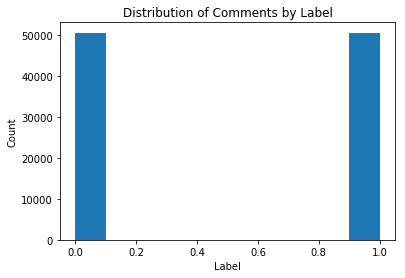

In [11]:
# Explore distribution of the data by label (0 -> non-sarcastic, 1 -> sarcastic)
plt.hist(chosen_data.label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Comments by Label')
plt.show()

In [12]:
# Explore distribution of comments by label 
chosen_data.groupby('label').describe()

comment                            
        count unique             top freq
label                                    
0       50538  46968         Thanks!   35
1       50538  47271  You forgot the  131

In [13]:
#Import NLTK library
!pip install nltk

     |████████████████████████████████| 1.5MB 5.1MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/41/c8/31/48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk


In [14]:
import nltk

In [15]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/jovyan/n

[nltk_data]    |   Unzipping corpora/sinica_treebank.zip.
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/smultron.zip.
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/state_union.zip.
[nltk_data]    | Downloading package stopwords to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/stopwords.zip.
[nltk_data]    | Downloading package subjectivity to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/subjectivity.zip.
[nltk_data]    | Downloading package swadesh to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/swadesh.zip.
[nltk_data]    | Downloading package switchboard to
[nltk_data]    |     /home/jovyan/nltk_data...
[nltk_data]    |   Unzipping corpora/switchboard.zip.
[nltk_data]    | Downloading package tim

True

In [16]:
from nltk.corpus import stopwords #Use this to get rid off meaningless words like "the, and, a"
from nltk.tokenize import word_tokenize #Split by word
from nltk.tokenize import sent_tokenize #Split by sentence

In [17]:
#Make sure all the comment column is str data type
chosen_data['comment'] = chosen_data['comment'].astype(str)
chosen_data['comment'] = chosen_data['comment'].astype(str)

#non_sarcastic = required_data.loc[required_data['label'] == 0]
#sarcastic = required_data.loc[required_data['label'] == 1]

#drop rows with na values on the comment column
#non_sarcastic['comment'].dropna(inplace=True)
#sarcastic['comment'].dropna(inplace=True)

#Make sure all the comment column is str data type
#non_sarcastic['comment'] = non_sarcastic['comment'].astype(str)
#sarcastic['comment'] = sarcastic['comment'].astype(str)
#print(len(non_sarcastic), len(sarcastic))

In [18]:
chosen_data['comment'] = chosen_data['comment'].apply(word_tokenize)
chosen_data['POS_tag'] = chosen_data['comment'].apply(nltk.pos_tag)
chosen_data.head()

,label,comment,POS_tag
0,0,"[Animal, rights, breh]","[(Animal, NNP), (rights, NNS), (breh, NN)]"
1,0,"[Baja, la, applicasion, de, Xfinity, Tv, to, go]","[(Baja, NNP), (la, CC), (applicasion, NN), (de..."
2,0,"[Safety, turd, ,, in, the, hot, tub]","[(Safety, NNP), (turd, NN), (,, ,), (in, IN), ..."
3,0,"[Infinite, hiatus]","[(Infinite, NNP), (hiatus, NN)]"
4,0,"[Those, institutions, still, have, no, lasting...","[(Those, DT), (institutions, NNS), (still, RB)..."


In [19]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

chosen_data['stem'] = chosen_data['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
chosen_data.head()

,label,comment,POS_tag,stem
0,0,"[Animal, rights, breh]","[(Animal, NNP), (rights, NNS), (breh, NN)]","[anim, right, breh]"
1,0,"[Baja, la, applicasion, de, Xfinity, Tv, to, go]","[(Baja, NNP), (la, CC), (applicasion, NN), (de...","[baja, la, applicas, de, xfiniti, tv, to, go]"
2,0,"[Safety, turd, ,, in, the, hot, tub]","[(Safety, NNP), (turd, NN), (,, ,), (in, IN), ...","[safeti, turd, ,, in, the, hot, tub]"
3,0,"[Infinite, hiatus]","[(Infinite, NNP), (hiatus, NN)]","[infinit, hiatus]"
4,0,"[Those, institutions, still, have, no, lasting...","[(Those, DT), (institutions, NNS), (still, RB)...","[those, institut, still, have, no, last, power..."


In [72]:
#data_len = len(data)
#data1 = data.iloc[0:(int(data_len/4))].copy()
#data1.tail()

In [73]:
#data2 = data.iloc[(int(data_len/4)):(int(data_len/2))].copy()
#data2.tail()

In [74]:
#data3 = data.iloc[(int(data_len/2)):(int(3*data_len/4))].copy()
#data3.tail()

In [75]:
#data4 = data.iloc[(int(3*data_len/4)):].copy()
#data4.tail()

In [76]:
# data4['comment'] = data4['comment'].apply(word_tokenize)
# data4.head()

In [77]:
# data4['POS_tag'] = data4['comment'].apply(nltk.pos_tag)
# data4.head()

In [78]:
# data4['stem'] = data4['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data4.head()

In [79]:
# data3['comment'] = data3['comment'].apply(word_tokenize)
# data3['POS_tag'] = data3['comment'].apply(nltk.pos_tag)
# data3['stem'] = data3['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data3.head()

In [80]:
# data2['comment'] = data2['comment'].apply(word_tokenize)
# data2['POS_tag'] = data2['comment'].apply(nltk.pos_tag)
# data2['stem'] = data2['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data2.head()

In [81]:
# data1['comment'] = data1['comment'].apply(word_tokenize)
# data1['POS_tag'] = data1['comment'].apply(nltk.pos_tag)
# data1['stem'] = data1['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# data1.head()

In [82]:
#Divide the required data set in half to ease later comment transformations
# df1 = data.iloc[0:(int(len(data)/2))].copy()
# df1.tail()

In [83]:
# df2 = data.iloc[(int(len(data)/2)):].copy()
# df2.tail()

In [17]:
#df1['tokenized_by_sent'] = df1['comment'].apply(sent_tokenize)
#df2['tokenized_by_sent'] = df2['comment'].apply(sent_tokenize)

#data['tokenized_by_sent'] = data['comment'].apply(sent_tokenize)
#data['tokenized_by_word'] = data['comment'].apply(word_tokenize)
#word = word_tokenize(sarcastic['comment'].iloc[56269])
#word
#note to nour, so when i try to do the first line of code it shows that index 56269 has an error but when i try to 
#individually tokenized that index, it works. Not sure how to fix this.

# note to Juan: Fixed by making dropna function is working correctly

In [84]:
# Tokenize by word first half

# df1['comment'] = df1['comment'].apply(word_tokenize)
# df1.head()

In [85]:
# Tokenize by word second half

# df2['comment'] = df2['comment'].apply(word_tokenize)
# df2.head()

In [86]:
# Parts of Speech tagging first half

# df1['POS_tag'] = df1['comment'].apply(nltk.pos_tag)
# df1.head()

#data['POS_tag'] = data['tokenized_by_word'].apply(nltk.pos_tag)
#nltk.pos_tag(data.iloc[0, 5])
#entities = nltk.chunk.ne_chunk( nltk.pos_tag(data.iloc[1, 5]))
#entities.draw()

In [87]:
# Parts of Speech tagging second half

# df2['POS_tag'] = df2['comment'].apply(nltk.pos_tag)
# df2.head()

In [88]:
#data.head()
# df1_len = len(df1)
# df2_len = len(df2)
# df14 = df1.iloc[0:int(df1_len/2)].copy()
# df24 = df1.iloc[(int(df1_len/2)):].copy()
# df34 = df2.iloc[0:int(df2_len/2)].copy()
# df44 = df2.iloc[(int(df2_len/2)):].copy()

In [89]:
# Stemming
#from nltk.stem import PorterStemmer

#data['stem'] = data['tokenized_by_word'].apply(lambda x: [PorterStemmer.stem(y) for y in x])

# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer("english")

# df14['stem'] = df14['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df14.head()

In [90]:
# df24['stem'] = df24['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df24.head()
#df2['stem'] = df2['tokenized_by_word'].apply(lambda x: [stemmer.stem(y) for y in x])
#df2.head()

In [91]:
# df34['stem'] = df34['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df34.head()

In [92]:
# df44['stem'] = df44['comment'].apply(lambda x: [stemmer.stem(y) for y in x])
# df44.head()

In [93]:
#from nltk.stem import WordNetLemmatizer
#data['lemma'] = data['tokenized_by_word'].apply(WordNetLemmatizer)
# df14.append(df24.append(df34.append(df44)))
# df14.tail()

### Predicting Sarcasm

We were interested in trying different models for predicting a sarcastic comment.
To determine the features and labels for the analysis, we decided to look at the comment itself as a feature and use the given sarcastic vs non-sarcastic classification as our label.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Determine the features and labels for the models
features = chosen_data['stem'].apply(lambda x: ' '.join(x))
labels = chosen_data['label']

In [20]:
#list(features)

In [22]:
# TF-IDF to vectorize the data

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() # ask about max features
features = list(features)
X = vectorizer.fit_transform(features)

In [23]:
#print(vectorizer.get_feature_names())
print(X.shape)

(101076, 37023)


In [24]:
#print(X)
X.toarray() # it only works if it's an array but why does it become all 0s?
X

<101076x37023 sparse matrix of type '<class 'numpy.float64'>'
	with 953981 stored elements in Compressed Sparse Row format>

In [48]:
#print(X)

In [26]:
# Cross-validation?

chosen_data.head()

,label,comment,POS_tag,stem
0,0,"[Animal, rights, breh]","[(Animal, NNP), (rights, NNS), (breh, NN)]","[anim, right, breh]"
1,0,"[Baja, la, applicasion, de, Xfinity, Tv, to, go]","[(Baja, NNP), (la, CC), (applicasion, NN), (de...","[baja, la, applicas, de, xfiniti, tv, to, go]"
2,0,"[Safety, turd, ,, in, the, hot, tub]","[(Safety, NNP), (turd, NN), (,, ,), (in, IN), ...","[safeti, turd, ,, in, the, hot, tub]"
3,0,"[Infinite, hiatus]","[(Infinite, NNP), (hiatus, NN)]","[infinit, hiatus]"
4,0,"[Those, institutions, still, have, no, lasting...","[(Those, DT), (institutions, NNS), (still, RB)...","[those, institut, still, have, no, last, power..."


In [44]:
# Split data into Training and Test data chosen_data[['comment', 'POS_tag', 'stem']]

X_train, X_test, y_train, y_test = train_test_split(X, chosen_data.label, test_size=0.2, random_state=0)

In [49]:
# Logistic Regression

log_clf = LogisticRegression(solver='lbfgs', max_iter = 200).fit(X_train, y_train)

In [50]:
# Predict the test values

log_clf.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [55]:
# Logistic regression score
print(log_clf.score(X_train, y_train))
print(log_clf.score(X_test, y_test))

0.7466485283205541
0.6775326474079937


In [52]:
# SVM model

svm_clf = LinearSVC()

In [53]:
# Training the model

svm_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [54]:
print(svm_clf.score(X_train, y_train))
print(svm_clf.score(X_test, y_test))

0.8067276774672273
0.6695191927186387


In [56]:
# Random Forest Classifier

rf_clf = RandomForestClassifier()

In [57]:
rf_clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
print(rf_clf.score(X_train, y_train))
print(rf_clf.score(X_test, y_test))

0.9799282710858274
0.6704095765730115
